# Introduction to (data | statistical | mathematical) modeling

This document covers a general introduction to modeling, for the purpose of *inference* and *prediction*.

## Zooming out for a second

We have spent significant time in attempting to collect and understand some datasets.  

**But what about answering the important questions?**

```{figure} ../img/ds-roadmap-cady.png
---
width: 80%
name: ds-roadmap
---
Data Science Roadmap {cite:p}`cady2017data`.
```

```{figure} ../img/data-analytics-df.jpg
---
width: 80%
name: data-analytics-df
---
Types of Data Analytics (DataForest).
```

## What is a model?

A model is a *representation* of a real (physical) system.

### Ball drop example
In one of your physics classes, you may have come across a simple free falling model:

$$ y(t) = - \frac{1}{2} g t^2, \quad v(t) = -g t. $$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-v0_8-colorblind')

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
h = 100  # Initial height (m)
t_total = np.sqrt(2*h/g)  # Total time for the ball to hit the ground (s)

# Time array from 0 to t_total
t = np.linspace(0, t_total, num=500)

# Calculate position and velocity as functions of time
y = - 0.5*g*t**2  # Position as a function of time
v = -g*t  # Velocity as a function of time

In [ ]:
# Plot position and velocity
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.plot(t, y, label='Height')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Height vs Time')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(t, v, label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.grid(True)

plt.tight_layout()
plt.show()

**Is this model useful?**

**Is this model accurate in capturing the freefalling behavior? Why and why not?**

**What may be a more realistic model?**

## Why do we build models?

There are three main reasons:

- to explain complex real-world phenomena,  **(interpretation)**
- to predict when there is uncertainty,     **(accuracy)**
- to make causal inference. 

### Examples (some nuclear physics, some epidemiology)

```{figure} ../img/nuclear-even-even.jpg
---
width: 75%
name: even-even
---
Even-even nuclei on the nuclear landscape {cite:p}`erler2012limits`.
```

```{figure} ../img/multiple-models-prediction.png
---
width: 60%
name: multiple-model-predictions
---
Summary of empirical constraints of the nuclear saturation point {cite:p}`drischler2024bayesian`.
```

```{figure} ../img/seir-model.png
---
width: 60%
name: seir-model
---
Example of compartmental model in epidemiology {cite:p}`reyne2022principles`.
```

## Modeling process

Consider this very general model:

$$ y = f(x; \theta) + \varepsilon,  \text{ where}$$

| Notation | Description                        |
|:---------|:-----------------------------------|
|$y$       | output (*or* outcome, response)    |
|$x$       | input (*or* feature, attribute)    |
|$f$       | model                              |
|$\theta$  | model parameter                    |
|$\varepsilon$ | unexplained error              |


**Questions for any model:**
1. How do we choose a model?
2. How do we quantify the unexplained error?
3. How do we choose the parameters (given data)?
4. How do we evaluate if the model is "good"?

### Penguins as an example

```{figure} ../img/penguins.jpg
---
width: 90%
name: penguin
---
Penguin (www.cabq.gov).
```

Consider the `penguins` dataset that has information about 345 penguins.

Perhaps we are interested in the relationship between the length of their flippers and their body mass

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

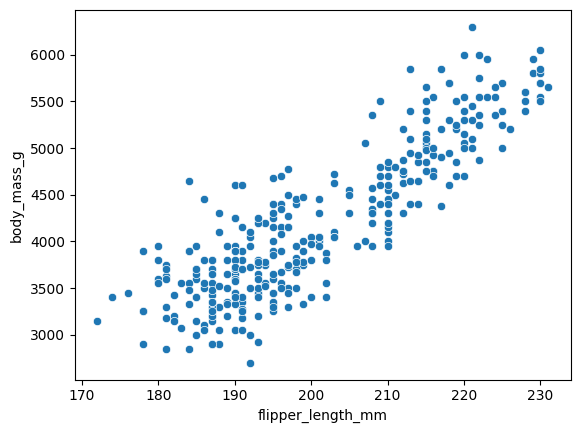

In [1]:
#!pip install seaborn
import seaborn as sns
import pandas as pd

penguins = sns.load_dataset('penguins')
# retain complete data
penguins = penguins[~penguins.isna().any(axis='columns')]

sns.scatterplot(y='body_mass_g', x='flipper_length_mm', data=penguins)

**Penguins**

1. How do we choose a model?

Say we select the following linear model:

$$ y_i = \beta_0 + \beta_1 x_i + \varepsilon_i.$$

2. How do we quantify the unexplained error?

The errors, as a result of the model choice, is

$$ \varepsilon_i = y_i - (\beta_0 + \beta_1 x_i).$$

3. How do we choose the parameters (given data)?

A common way to select the parameters is to minimize errors, specified by a **loss** function.  Loss functions are designed to evaluate how good a parameter is.

For examples, both of the following would be a legitimate loss function, with respect to $\boldsymbol{\beta}$:

$$ \ell_1(\boldsymbol{\beta}) = \sum_{i=1}^n |y_i - (\beta_0 + \beta_1 x_i)|, $$
$$ \ell_2(\boldsymbol{\beta}) = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2. $$

In [2]:
y = penguins.body_mass_g.values
x = penguins.flipper_length_mm.values

def l1_loss(beta, x, y):
    return np.sum(np.abs(y - beta[0] - beta[1]*x))

In [6]:
# FILL-IN: write the l2_loss function and return the l2_loss where beta = np.array((0, 1))
def l2_loss(beta, x, y):
    return np.sum((y - beta[0] - beta[1]*x)**2)

In [7]:
import numpy as np

beta = np.array((0, 1))  # a "guess"

l1_loss(beta, x, y)
l2_loss(beta, x, y)

5553019380.0

Under the hood of "fitting":

Given a loss function, the fitting step means to find a set of parameters that minimizes the loss.  Inheritly, it is an optimization.

In [ ]:
!pip install scipy

In [16]:
import scipy

beta0 = beta
l1_opt = scipy.optimize.minimize(l1_loss, beta0, args=(x, y), method='Nelder-Mead')

In [17]:
l1_opt

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 103608.53658871358
             x: [-5.985e+03  5.061e+01]
           nit: 196
          nfev: 364
 final_simplex: (array([[-5.985e+03,  5.061e+01],
                       [-5.985e+03,  5.061e+01],
                       [-5.985e+03,  5.061e+01]]), array([ 1.036e+05,  1.036e+05,  1.036e+05]))

In [18]:
# FILL-IN: find the optimal parameters using the l2_loss function.
l2_opt = scipy.optimize.minimize(l2_loss, beta0, args=(x, y))

In [19]:
l2_opt

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 51211962.729684055
        x: [-5.872e+03  5.015e+01]
      nit: 6
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 3.113e-01 -1.542e-03]
            [-1.542e-03  7.671e-06]]
     nfev: 33
     njev: 11

4. How do we evaluate if the model is "good"?

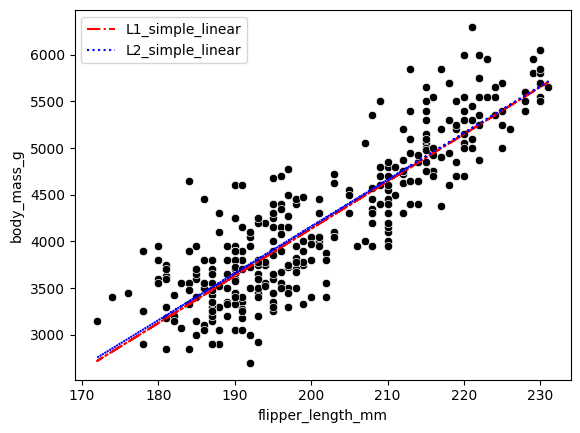

In [20]:
import matplotlib.pyplot as plt

# assuming we have l2_opt from optimize.minimize

fig, ax = plt.subplots(1, 1)
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', color='k', data=penguins, ax=ax)
ax.plot(x, l1_opt.x[0] + l1_opt.x[1] * x, color='red', linestyle='-.', label='L1_simple_linear')
ax.plot(x, l2_opt.x[0] + l2_opt.x[1] * x, color='blue', linestyle=':', label='L2_simple_linear')
plt.legend()

**(Why not) try a constant model?**

$$y_i = \beta_0 + \varepsilon_i.$$

In [21]:
def l1_constant_loss(beta, y): 
    return np.sum(np.abs(y - beta))
    
def l2_constant_loss(beta, y):
    return np.sum((y - beta)**2)

l1_constant_opt = scipy.optimize.minimize(l1_constant_loss, 0, args=y)
l2_constant_opt = scipy.optimize.minimize(l2_constant_loss, 0, args=y)

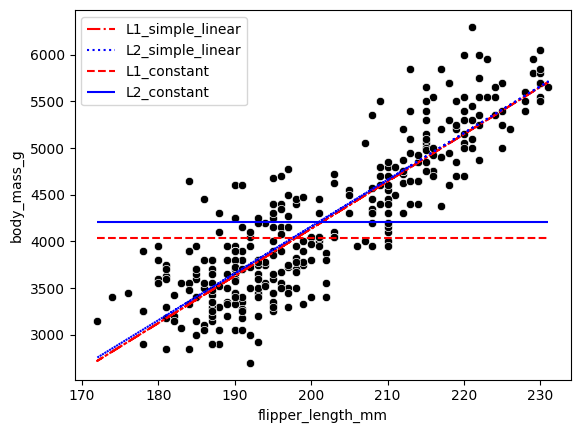

In [22]:
# plotting code after l1_constant_opt, l2_constant_opt are defined

fig, ax = plt.subplots(1, 1)
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', color='k', data=penguins, ax=ax)
ax.plot(x, l1_opt.x[0] + l1_opt.x[1] * x, color='red', linestyle='-.', label='L1_simple_linear')
ax.plot(x, l2_opt.x[0] + l2_opt.x[1] * x, color='blue', linestyle=':', label='L2_simple_linear')
ax.hlines(y=l1_constant_opt.x, xmin=np.min(x), xmax=np.max(x), color='red', linestyle='--', label='L1_constant')
ax.hlines(y=l2_constant_opt.x, xmin=np.min(x), xmax=np.max(x), color='blue', linestyle='-', label='L2_constant')
plt.legend()

In [23]:
# 
l1_constant_opt.x

array([4040.16187975])

In [24]:
l2_constant_opt.x

array([4207.05690806])

In [25]:
np.mean(y)

4207.057057057057

In [26]:
np.median(y)

4050.0

**What if we are shown this graph?**

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

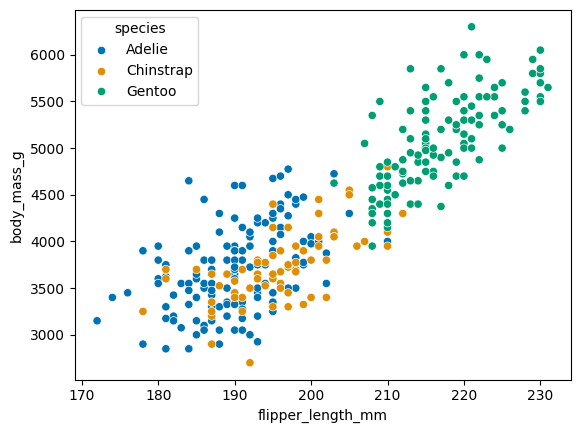

In [29]:
sns.set_palette('colorblind')
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', hue='species', data=penguins)

$$y_i = \beta_0 + \beta_1 \text{[flipper\_length\_mm]} + \beta_2 \text{[is\_adelie]} + \beta_3 \text{[is\_chinstrap]} + \beta_4 \text{[is\_gentoo]}$$

In [ ]:
!pip install scikit-learn

In [37]:
# categorial predictor?
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

### Retrieve result from transformation
enc.fit(penguins[['species']])
species_onehot = enc.transform(penguins[['species']]).todense()

In [38]:
# Form the design matrix
X = np.array((np.ones(x.shape[0]), x)).T

X = np.column_stack((X, species_onehot))

X = np.array(X)
X

array([[  1., 181.,   1.,   0.,   0.],
       [  1., 186.,   1.,   0.,   0.],
       [  1., 195.,   1.,   0.,   0.],
       ...,
       [  1., 222.,   0.,   0.,   1.],
       [  1., 212.,   0.,   0.,   1.],
       [  1., 213.,   0.,   0.,   1.]])

In [56]:
# Linear regression
from sklearn.linear_model import LinearRegression

### FILL-IN: fitting linear regression
reg = LinearRegression(fit_intercept=False)
reg.fit(X[:, 1:], y)

LinearRegression(fit_intercept=False)

In [57]:
betas = reg.coef_

In [58]:
betas

array([   40.60616529, -4013.17888796, -4218.5543678 , -3728.65528511])

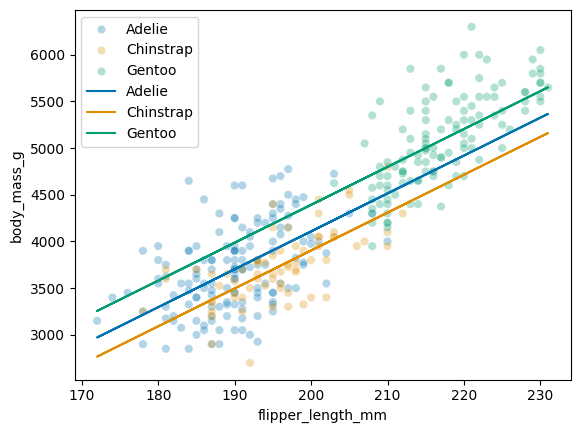

In [48]:
# After linear regression fit
fig, ax = plt.subplots(1, 1)
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', hue='species', data=penguins, alpha=0.3)
for i in range(2, 5):
    ax.plot(x, betas[0] + betas[1]*x + betas[i], label=enc.categories_[0][i-2])
plt.legend()

**Revisiting the analytical solution**

Are they the same? Why and why not?

$$\boldsymbol{\beta} = (X^T X)^{-1} X^T y $$

In [54]:
betas_hat = np.linalg.solve(X[:,1:].T @ X[:,1:], X[:,1:].T @ y)

In [55]:
betas_hat

array([   40.60616529, -4013.17888796, -4218.5543678 , -3728.65528511])

In [59]:
betas

array([   40.60616529, -4013.17888796, -4218.5543678 , -3728.65528511])

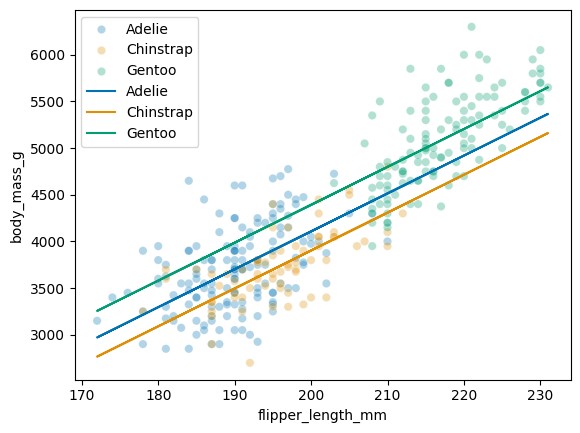

In [53]:
# After linear regression fit
fig, ax = plt.subplots(1, 1)
sns.scatterplot(y='body_mass_g', x='flipper_length_mm', hue='species', data=penguins, alpha=0.3)
for i in range(2, 5):
    ax.plot(x, betas_hat[0] + betas_hat[1]*x + betas_hat[i], label=enc.categories_[0][i-2])
plt.legend()

## Practice 12 - Diamonds

Consider the `diamonds` dataset.  Specifically, investigate the relationship between `carat` and `price`.

Answer the same modeling process questions:

1. How do we choose a model?
2. How do we quantify the unexplained error?
3. How do we choose the parameters (given data)?
4. How do we evaluate if the model is "good"?

In [ ]:
diamonds = sns.load_dataset('diamonds')

In [ ]:
sns.scatterplot(y='price', x='carat', color='k', data=diamonds)

## Practice 13 - Diamond (Quantitative)

1. Select two different "models" to relate carat and price.  (Maybe not the constant model...)
2. Evaluate each model using L1 and L2 loss functions.
3. Fit each model with L1 and L2 loss functions.
4. Plot all model predictions (with labels).